In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import catboost
import numpy as np
import xgboost as xgb

from sklearn.model_selection import train_test_split, cross_val_score
import lightgbm as lgb

In [2]:
train=pd.read_csv('train.csv')
train_index=train.index
test=pd.read_csv('test.csv')
test['target']=0
dataset=train.append(test)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33380 entries, 0 to 15020
Data columns (total 14 columns):
enrollee_id               33380 non-null int64
city                      33380 non-null object
city_development_index    33380 non-null float64
gender                    25894 non-null object
relevent_experience       33380 non-null object
enrolled_university       32759 non-null object
education_level           32528 non-null object
major_discipline          28149 non-null object
experience                33277 non-null object
company_size              24550 non-null object
company_type              24011 non-null object
last_new_job              32709 non-null object
training_hours            33380 non-null int64
target                    33380 non-null int64
dtypes: float64(1), int64(3), object(10)
memory usage: 3.8+ MB


In [4]:
dataset.describe()

,enrollee_id,city_development_index,training_hours,target
count,33380.000000,33380.000000,33380.000000,33380.000000
mean,16690.500000,0.846934,65.565638,0.072648
std,9636.120329,0.109972,60.363572,0.259562
min,1.000000,0.448000,1.000000,0.000000
25%,8345.750000,0.794000,23.000000,0.000000
50%,16690.500000,0.910000,47.000000,0.000000
75%,25035.250000,0.920000,89.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [5]:
dataset.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    7486
relevent_experience          0
enrolled_university        621
education_level            852
major_discipline          5231
experience                 103
company_size              8830
company_type              9369
last_new_job               671
training_hours               0
target                       0
dtype: int64

In [6]:
train.groupby('target')['target'].count() / train.shape[0]

target
0    0.867912
1    0.132088
Name: target, dtype: float64

In [7]:
dataset['city']=dataset['city'].apply(lambda x: x.replace('city_', ''))
dataset['city']=dataset['city'].astype(int)

In [8]:
dataset['enrollee_id'].nunique()

33380

In [9]:
dataset.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


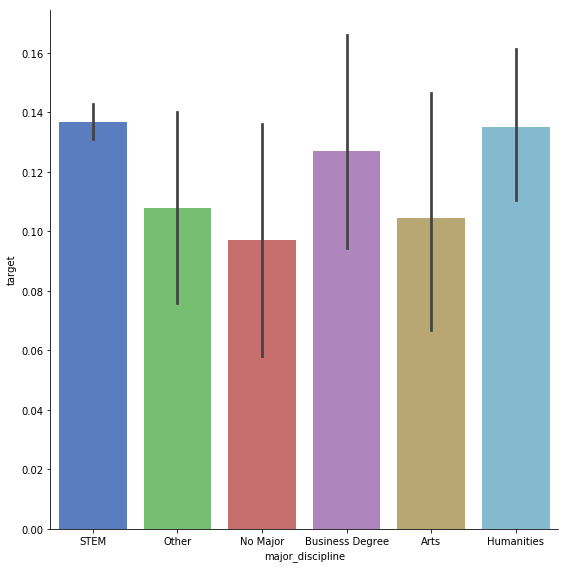

In [10]:
g = sns.factorplot(x='major_discipline',y='target', data=train, kind='bar', size = 8 , palette = 'muted')

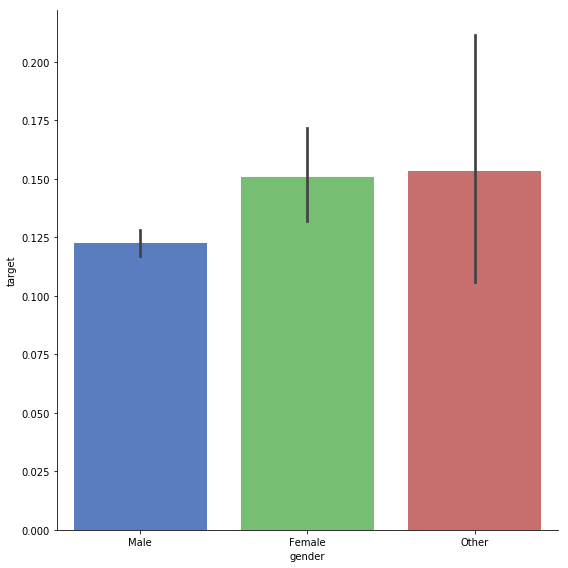

In [11]:
g = sns.factorplot(x='gender',y='target', data=train, kind='bar', size = 8 , palette = 'muted')

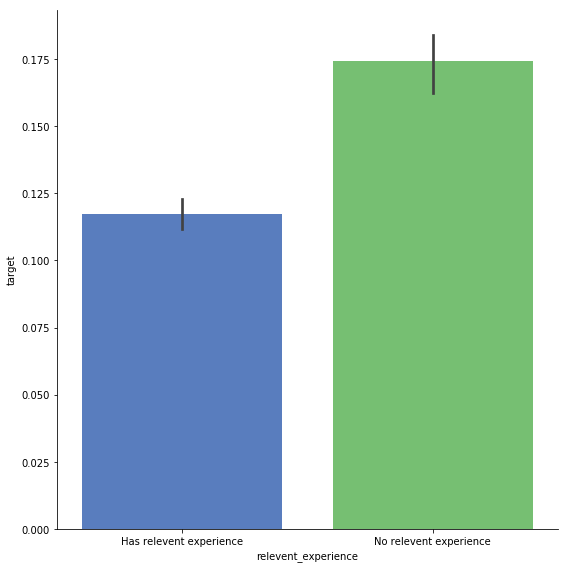

In [12]:
g = sns.factorplot(x='relevent_experience',y='target', data=train, kind='bar', size = 8 , palette = 'muted')

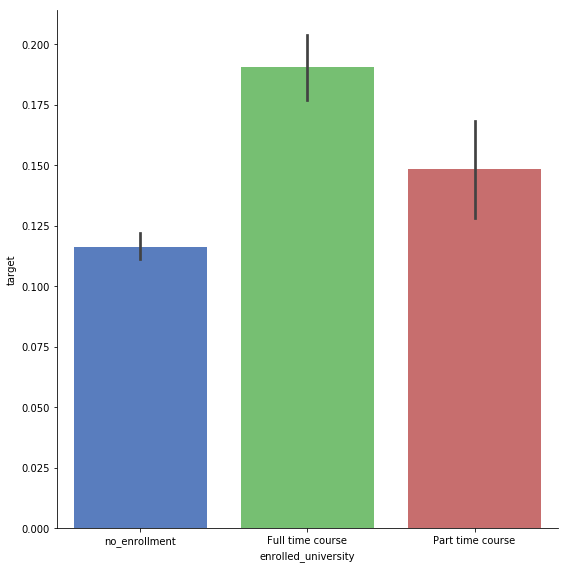

In [13]:
g = sns.factorplot(x='enrolled_university',y='target', data=train, kind='bar', size = 8 , palette = 'muted')

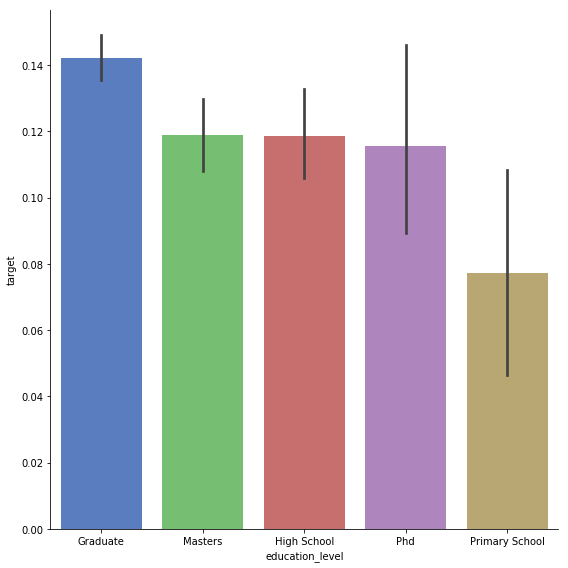

In [14]:
g = sns.factorplot(x='education_level',y='target', data=train, kind='bar', size = 8 , palette = 'muted')

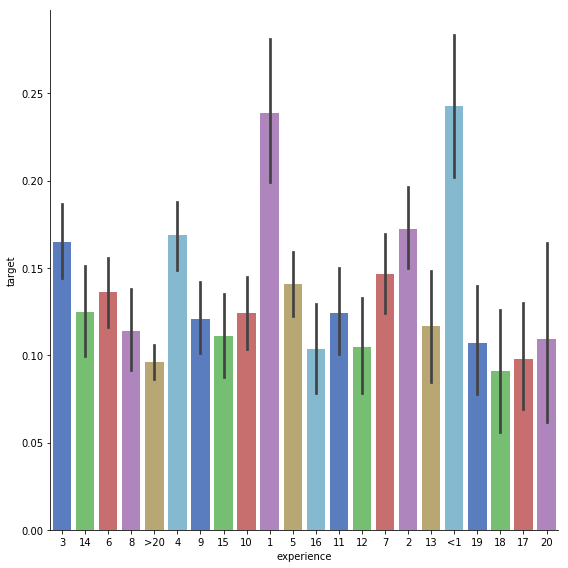

In [15]:
g = sns.factorplot(x='experience',y='target', data=train, kind='bar', size = 8 , palette = 'muted')

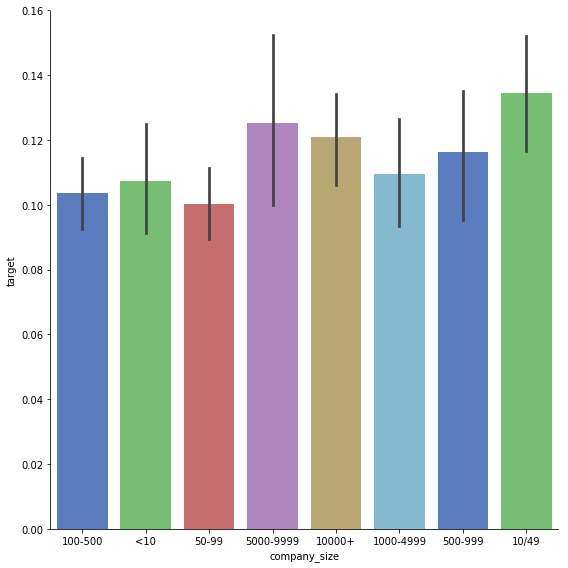

In [16]:
g = sns.factorplot(x='company_size',y='target', data=train, kind='bar', size = 8 , palette = 'muted')

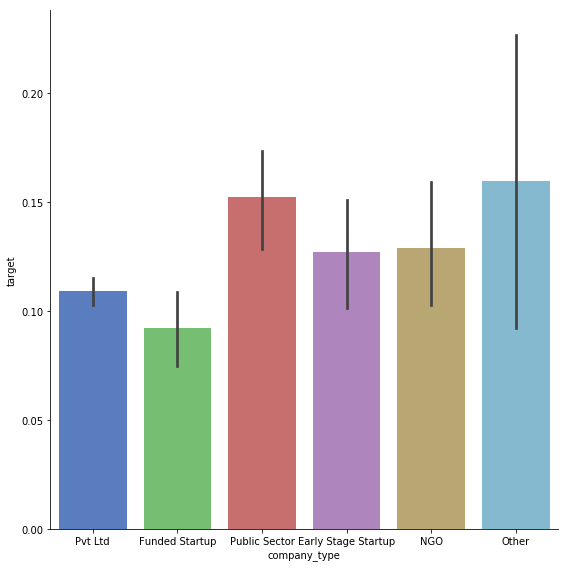

In [17]:
g = sns.factorplot(x='company_type',y='target', data=train, kind='bar', size = 8 , palette = 'muted')

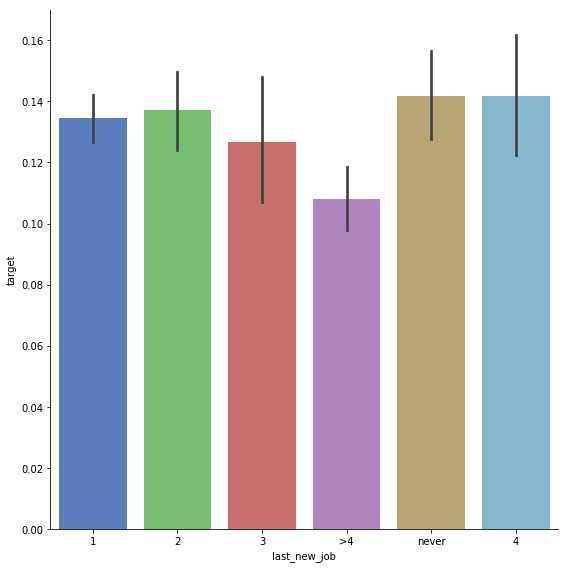

In [18]:
g = sns.factorplot(x='last_new_job',y='target', data=train, kind='bar', size = 8 , palette = 'muted')

In [19]:
dataset['gender'] = dataset['gender'].map({'Male':0, 'Female':1, 'Other' : 2})
dataset['relevent_experience'] = dataset['relevent_experience'].map({'Has relevent experience':1, 'No relevent experience':0})
dataset['enrolled_university'] = dataset['enrolled_university'].map({'Full time course':2, 'Part time course':1, 'no_enrollment' : 0})
dataset['education_level'] = dataset['education_level'].map({'Phd ':0, 'Masters':1, 'Graduate' : 2, 'High School':3, 'Primary School' : 4})
dataset['major_discipline'] = dataset['major_discipline'].map({'STEM':0, 'Humanities':1, 'Other' : 3, 'Business Degree':2, 'Arts' : 4, 'No Major': 5})
dataset['experience'] = dataset['experience'].map({'1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, '10':10, '11':11, '12':12, '13':13, '14':14, '15':15, '16':16, '17':17, '18':18, '19':19, '20':20,'<1':0, '>20':21})
dataset['company_size'] = dataset['company_size'].map({'<10':0, '10/49':1, '50-99':2 , '100-500':3, '500-999':4, '1000-4999':5, '5000-9999':6, '10000+':7})
dataset['company_type'] = dataset['company_type'].map({'Early Stage Startup':0, 'Funded Startup':1, 'NGO':2,'Other':3, 'Public Sector':4, 'Pvt Ltd':5})                                    
dataset['last_new_job'] = dataset['last_new_job'].map({'never':0, '>4':5, '1':1, '2':2, '3':3, '4':4})

In [20]:
dataset['new_exp']=dataset['experience'].apply(lambda x: 1 if x<5 else 0 )
dataset['magic']=dataset['city_development_index'] * dataset['experience']
dataset['magic1']=dataset['city_development_index'] * dataset['training_hours']
dataset['magic2']=dataset['city_development_index'] * dataset['city']

In [21]:
dataset=dataset.astype(float)

In [22]:
dataset.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,new_exp,magic,magic1,magic2
0,23798.0,149.0,0.689,0.0,1.0,0.0,2.0,0.0,3.0,3.0,5.0,1.0,106.0,0.0,1.0,2.067,73.034,102.661
1,29166.0,83.0,0.923,0.0,1.0,0.0,2.0,0.0,14.0,0.0,1.0,1.0,69.0,0.0,0.0,12.922,63.687,76.609
2,46.0,16.0,0.910,NaN,1.0,0.0,2.0,0.0,6.0,2.0,4.0,2.0,4.0,0.0,0.0,5.460,3.640,14.560
3,18527.0,64.0,0.666,0.0,1.0,0.0,2.0,0.0,14.0,2.0,5.0,1.0,26.0,0.0,0.0,9.324,17.316,42.624
4,21751.0,100.0,0.887,NaN,0.0,0.0,1.0,0.0,8.0,NaN,NaN,2.0,88.0,1.0,0.0,7.096,78.056,88.700


In [23]:
dataset.describe()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,new_exp,magic,magic1,magic2
count,33380.000000,33380.000000,33380.000000,25894.000000,33380.000000,32759.000000,31647.000000,28149.000000,33277.000000,24550.000000,24011.000000,32709.000000,33380.000000,33380.000000,33380.000000,33277.000000,33380.000000,33380.000000
mean,16690.500000,83.400240,0.846934,0.107322,0.739904,0.415886,1.910608,0.287008,10.563963,3.248391,4.257757,2.062429,65.565638,0.072648,0.232534,9.172421,55.552154,72.278907
std,9636.120329,45.363071,0.109972,0.350158,0.438693,0.770788,0.659691,0.921886,6.790277,2.182359,1.499934,1.687005,60.363572,0.259562,0.422454,6.225096,52.031026,40.960285
min,1.000000,1.000000,0.448000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.666000,0.847000
25%,8345.750000,36.000000,0.794000,0.000000,0.000000,0.000000,2.000000,0.000000,5.000000,2.000000,5.000000,1.000000,23.000000,0.000000,0.000000,3.704000,19.316000,31.900000
50%,16690.500000,103.000000,0.910000,0.000000,1.000000,0.000000,2.000000,0.000000,9.000000,3.000000,5.000000,1.000000,47.000000,0.000000,0.000000,7.764000,39.721000,89.725000
75%,25035.250000,105.000000,0.920000,0.000000,1.000000,0.000000,2.000000,0.000000,16.000000,5.000000,5.000000,3.000000,89.000000,0.000000,0.000000,14.560000,75.131500,94.760000
max,33380.000000,180.000000,0.949000,2.000000,1.000000,2.000000,4.000000,5.000000,21.000000,7.000000,5.000000,5.000000,336.000000,1.000000,1.000000,19.929000,318.864000,153.807000


In [24]:
train.corr()

,enrollee_id,city_development_index,training_hours,target
enrollee_id,1.000000,-0.033466,0.001248,0.033873
city_development_index,-0.033466,1.000000,-0.006193,-0.135700
training_hours,0.001248,-0.006193,1.000000,-0.004735
target,0.033873,-0.135700,-0.004735,1.000000


In [25]:
dataset.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    7486
relevent_experience          0
enrolled_university        621
education_level           1733
major_discipline          5231
experience                 103
company_size              8830
company_type              9369
last_new_job               671
training_hours               0
target                       0
new_exp                      0
magic                      103
magic1                       0
magic2                       0
dtype: int64

In [26]:
columns = ['city','gender','relevent_experience','enrolled_university']
for col in columns:
    dummy=pd.get_dummies(dataset[col])
    dataset=pd.concat([dataset, dummy], axis=1)
dataset=dataset.drop(['city','gender','relevent_experience','enrolled_university', 'experience'], axis=1)
dataset['training_hours']=np.log(dataset['training_hours'])
dataset.loc[dataset['training_hours'] < 1.3, 'training_hours']=3.8

In [27]:
dataset.isnull().sum()

enrollee_id                  0
city_development_index       0
education_level           1733
major_discipline          5231
company_size              8830
company_type              9369
last_new_job               671
training_hours               0
target                       0
new_exp                      0
magic                      103
magic1                       0
magic2                       0
1.0                          0
2.0                          0
7.0                          0
8.0                          0
9.0                          0
10.0                         0
11.0                         0
12.0                         0
13.0                         0
14.0                         0
16.0                         0
18.0                         0
19.0                         0
20.0                         0
21.0                         0
23.0                         0
24.0                         0
                          ... 
143.0                        0
144.0   

In [28]:
y=dataset.target.values[:len(train_index)]
X=dataset.drop(['target', 'enrollee_id'], axis=1).values[:len(train_index),:]
#X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
from sklearn.metrics import roc_auc_score
dtrain = xgb.DMatrix(X, label=y)
#dtest = xgb.DMatrix(X_test, label=y_test)

In [30]:
param = {  
    'objective': 'binary:logistic', 
    'n_estimators': 1000,
    'eval_metric':'auc',
    'gamma':4,
    'colsample_bytree':0.6,
    'n_thread':4,
    'silent':0,
    'eta':.002,
    'lambda': 1.1,
    'colsample_bylevel': 0.8,
    'max_depth':8,
    'alpha': 1.2
        }  
num_round = 2000
bst=xgb.train(param, dtrain, num_round)

In [31]:
#print(roc_auc_score(y_train, bst.predict(dtrain)))

In [32]:
#print(roc_auc_score(y_test, bst.predict(dtest)))

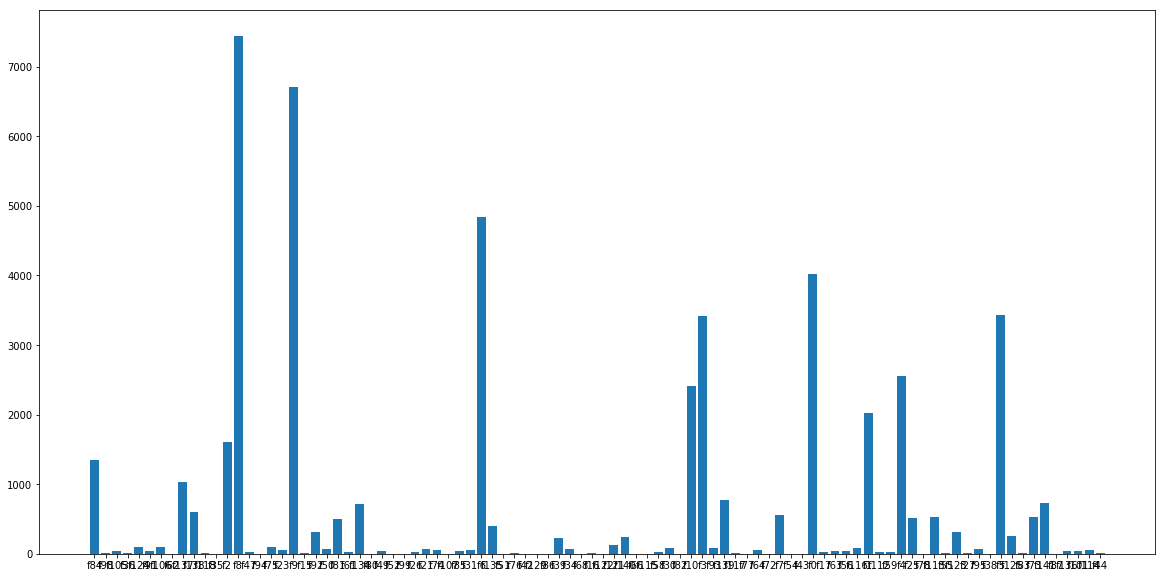

In [33]:
from matplotlib import pyplot
pyplot.figure(figsize=(20,10))
pyplot.bar(bst.get_score().keys(), bst.get_score().values())
pyplot.xticks(range(len(bst.get_fscore())))
pyplot.show()

In [34]:
Xtest=dataset.drop(['enrollee_id', 'target'], axis=1).values[len(train_index):,:]
y_sample=dataset['target'].values[len(train_index):]
dtest_final=xgb.DMatrix(Xtest, label=y_sample)

In [35]:
Submission = pd.DataFrame({ 'enrollee_id': test['enrollee_id'],
                            'target':np.ravel(bst.predict(dtest_final))})
Submission.to_csv("Submission.csv", index=False)